<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# get matplot to show charts inline
import seaborn as sns
%matplotlib inline

In [468]:
pwd

'/Users/macbookpro'

chrome://settings/content/cookies

NOTE: Make sure third party cookies are not blocked.

In [400]:
#from google.colab import files
#uploaded = files.upload()
#import io
#df = pd.read_csv(io.BytesIO(uploaded["Employee-attrition.csv"]))
df = pd.read_csv("Employee_updated.csv")

In [401]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/03/1954,8/28/1989,1/01/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1319,12/31/2006 0:00,1/03/1957,8/28/1989,1/01/1900,49,17,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
2,1320,12/31/2006 0:00,1/02/1955,8/28/1989,1/01/1900,51,17,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
3,1321,12/31/2006 0:00,1/02/1959,8/28/1989,1/01/1900,47,17,Vancouver,Executive,VP Human Resources,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
4,1322,12/31/2006 0:00,1/09/1958,8/31/1989,1/01/1900,48,17,Vancouver,Executive,VP Finance,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE


In [402]:
df.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
4440,6627,12/31/2006 0:00,10/23/1981,12/24/2006,1/01/1900,25,0,Burnaby,Dairy,Dairy Person,5,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,STORES
4441,6628,12/31/2006 0:00,10/22/1981,12/24/2006,1/01/1900,25,0,Quesnel,Customer Service,Cashier,28,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,STORES
4442,6629,12/31/2006 0:00,10/25/1981,12/26/2006,1/01/1900,25,0,Vancouver,Processed Foods,Shelf Stocker,43,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,STORES
4443,6630,12/31/2006 0:00,10/29/1981,12/28/2006,1/01/1900,25,0,Aldergrove,Dairy,Dairy Person,2,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,STORES
4444,6631,12/31/2006 0:00,11/05/1981,12/31/2006,11/05/2011,25,0,Kelowna,Dairy,Dairy Person,16,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,STORES


# Accessing the main DataFrame components

In [403]:
columns = df.columns
index = df.index
data = df.values

In [404]:
columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [405]:
index

RangeIndex(start=0, stop=4445, step=1)

In [406]:
data

array([[1318, '12/31/2006 0:00', '1/03/1954', ..., 2006, 'ACTIVE',
        'HEADOFFICE'],
       [1319, '12/31/2006 0:00', '1/03/1957', ..., 2006, 'ACTIVE',
        'HEADOFFICE'],
       [1320, '12/31/2006 0:00', '1/02/1955', ..., 2006, 'ACTIVE',
        'HEADOFFICE'],
       ...,
       [6629, '12/31/2006 0:00', '10/25/1981', ..., 2006, 'ACTIVE',
        'STORES'],
       [6630, '12/31/2006 0:00', '10/29/1981', ..., 2006, 'ACTIVE',
        'STORES'],
       [6631, '12/31/2006 0:00', '11/05/1981', ..., 2006, 'ACTIVE',
        'STORES']], dtype=object)

# 1. Understanding Data Types

#### 1.A Find Shape of Data Frame

In [407]:
# A:
print(df.shape)

(4445, 18)


#### 1.B Find Data Tyeps of Data Frame

In [408]:
# A:
df.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

#### 1.C Find Number of Data Types in a Data Frame



```
Expected Output:
int64      5
object    13
dtype: int64
```



In [409]:
#A
df.dtypes.value_counts()

object    13
int64      5
dtype: int64

#### 1.D Use Info

Use info and explore difference.

In [410]:
# A:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4445 entries, 0 to 4444
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           4445 non-null   int64 
 1   recorddate_key       4445 non-null   object
 2   birthdate_key        4445 non-null   object
 3   orighiredate_key     4445 non-null   object
 4   terminationdate_key  4445 non-null   object
 5   age                  4445 non-null   int64 
 6   length_of_service    4445 non-null   int64 
 7   city_name            4445 non-null   object
 8   department_name      4445 non-null   object
 9   job_title            4445 non-null   object
 10  store_name           4445 non-null   int64 
 11  gender_short         4445 non-null   object
 12  gender_full          4445 non-null   object
 13  termreason_desc      4445 non-null   object
 14  termtype_desc        4445 non-null   object
 15  STATUS_YEAR          4445 non-null   int64 
 16  STATUS

# 2. Selecting Column in Data Frame

#### 2.A Check Values of Job_Title column

In [411]:
# A:
df['job_title'].value_counts()

Meat Cutter                        1097
Produce Clerk                       945
Baker                               810
Dairy Person                        716
Shelf Stocker                       308
Cashier                             289
Store Manager                        35
Meats Manager                        34
Bakery Manager                       33
Produce Manager                      33
Processed Foods Manager              32
Customer Service Manager             32
HRIS Analyst                          8
Recruiter                             8
Benefits Admin                        5
Labor Relations Analyst               5
Systems Analyst                       5
Accounting Clerk                      5
Accounts Receiveable Clerk            4
Trainer                               4
Auditor                               3
Compensation Analyst                  3
Accounts Payable Clerk                3
Corporate Lawyer                      3
Investment Analyst                    3


#### 2.B Find How Many Rows Are in Each Job Title



```
# Expected Output
Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
.
.
.
```



In [412]:
# A:
def row_count(column_name):
    number_of_rows = len(df.axes[0])
    print("Number of Rows: "+str(number_of_rows))
    return number_of_rows


In [413]:
row_count('city_name')

Number of Rows: 4445


4445

#### 2.C [BONUS] Write A Function to Row Count



```
def row_count(column_name):
    number_of_rows = 0
    return number_of_rows
```



#### 2.D Describe 'Age'

Find count,  mean,  std, min, max of column 'age'

In [414]:
# A:
df['age'].describe()

count    4445.000000
mean       43.259843
std        11.021406
min        25.000000
25%        34.000000
50%        43.000000
75%        52.000000
max        64.000000
Name: age, dtype: float64

##### 2.E [BONUS] Describe 'All Numeric Columns of Data Frame

Find count, mean, std, min, max of of all columns of dataframe

In [415]:
# A:
df.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,4445.000000,4445.000000,4445.000000,4445.000000,4445.0
mean,4215.734983,43.259843,8.213048,27.137683,2006.0
std,1500.403587,11.021406,4.788019,13.168213,0.0
min,1318.000000,25.000000,0.000000,1.000000,2006.0
25%,2980.000000,34.000000,4.000000,17.000000,2006.0
50%,4355.000000,43.000000,8.000000,28.000000,2006.0
75%,5506.000000,52.000000,12.000000,41.000000,2006.0
max,6631.000000,64.000000,17.000000,46.000000,2006.0


# 3. Making The Index Meaningful

##### A:inplace = True : When inplace = True , the data is modified in place, which means it will
##### return nothing and the dataframe is now updated. When inplace = False , 
#####  which is the default, then the operation is performed and it returns a copy of the object. 


In [416]:
#will set the EmployeeID as an index
df_new = df.set_index('EmployeeID', inplace = True) 


In [417]:
df.head()

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
1318,12/31/2006 0:00,1/03/1954,8/28/1989,1/01/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1319,12/31/2006 0:00,1/03/1957,8/28/1989,1/01/1900,49,17,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1320,12/31/2006 0:00,1/02/1955,8/28/1989,1/01/1900,51,17,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1321,12/31/2006 0:00,1/02/1959,8/28/1989,1/01/1900,47,17,Vancouver,Executive,VP Human Resources,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1322,12/31/2006 0:00,1/09/1958,8/31/1989,1/01/1900,48,17,Vancouver,Executive,VP Finance,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE


#### 3.A Find A Specifc Row Using Index

In [418]:
# A:
df.iloc[1]

recorddate_key         12/31/2006 0:00
birthdate_key                1/03/1957
orighiredate_key             8/28/1989
terminationdate_key          1/01/1900
age                                 49
length_of_service                   17
city_name                    Vancouver
department_name              Executive
job_title                    VP Stores
store_name                          35
gender_short                         F
gender_full                     Female
termreason_desc         Not Applicable
termtype_desc           Not Applicable
STATUS_YEAR                       2006
STATUS                          ACTIVE
BUSINESS_UNIT               HEADOFFICE
Name: 1319, dtype: object

In [419]:
# Resetting index
df.reset_index(inplace = True)

#### 3.B Sort Data Frame using Index

In [420]:
# A:
df.sort_index(axis=0, ascending=True)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/03/1954,8/28/1989,1/01/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1319,12/31/2006 0:00,1/03/1957,8/28/1989,1/01/1900,49,17,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
2,1320,12/31/2006 0:00,1/02/1955,8/28/1989,1/01/1900,51,17,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
3,1321,12/31/2006 0:00,1/02/1959,8/28/1989,1/01/1900,47,17,Vancouver,Executive,VP Human Resources,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
4,1322,12/31/2006 0:00,1/09/1958,8/31/1989,1/01/1900,48,17,Vancouver,Executive,VP Finance,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440,6627,12/31/2006 0:00,10/23/1981,12/24/2006,1/01/1900,25,0,Burnaby,Dairy,Dairy Person,5,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,STORES
4441,6628,12/31/2006 0:00,10/22/1981,12/24/2006,1/01/1900,25,0,Quesnel,Customer Service,Cashier,28,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,STORES
4442,6629,12/31/2006 0:00,10/25/1981,12/26/2006,1/01/1900,25,0,Vancouver,Processed Foods,Shelf Stocker,43,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,STORES
4443,6630,12/31/2006 0:00,10/29/1981,12/28/2006,1/01/1900,25,0,Aldergrove,Dairy,Dairy Person,2,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,STORES


#### 3.C [BONUS] Sort Data Frame using Age

In [421]:
# A:
df.sort_values('age')

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
4444,6631,12/31/2006 0:00,11/05/1981,12/31/2006,11/05/2011,25,0,Kelowna,Dairy,Dairy Person,16,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,STORES
4366,6553,12/31/2006 0:00,3/29/1981,9/06/2006,1/01/1900,25,0,Nanaimo,Processed Foods,Shelf Stocker,18,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,STORES
4367,6554,12/31/2006 0:00,4/01/1981,9/07/2006,1/01/1900,25,0,Quesnel,Customer Service,Cashier,28,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,STORES
4368,6555,12/31/2006 0:00,4/04/1981,9/09/2006,1/01/1900,25,0,Burnaby,Dairy,Dairy Person,5,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,STORES
4369,6556,12/31/2006 0:00,4/05/1981,9/09/2006,1/01/1900,25,0,Vancouver,Processed Foods,Shelf Stocker,43,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,STORES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2761,12/31/2006 0:00,5/02/1942,11/07/1993,5/02/2007,64,13,Fort St John,Meats,Meat Cutter,12,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,STORES
933,2756,12/31/2006 0:00,4/30/1942,11/05/1993,4/30/2007,64,13,Williams Lake,Meats,Meat Cutter,40,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,STORES
928,2750,12/31/2006 0:00,4/26/1942,11/01/1993,4/26/2007,64,13,Surrey,Meats,Meat Cutter,31,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,STORES
1047,2900,12/31/2006 0:00,9/06/1942,3/14/1994,9/06/2007,64,12,Vancouver,Dairy,Dairy Person,35,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,STORES


#### 3.D [BONUS] Using Sample Select Any Row 

In [422]:
# A:
df.sample()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
1325,3250,12/31/2006 0:00,5/22/1959,2/21/1995,1/01/1900,47,11,Kelowna,Meats,Meat Cutter,16,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,STORES


# 4. Query Data Frame

#### 4.A Find Rows Where Job_Title is CEO

In [423]:
# A:
df.loc[df['job_title'] == 'CEO']

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/03/1954,8/28/1989,1/01/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE


#### 4.B Group By Age

In [465]:

df.groupby("age").describe()


EmployeeID                                                             \
         count         mean         std     min      25%     50%      75%   
age                                                                         
25       108.0  6577.342593   31.553000  6523.0  6550.75  6577.5  6604.25   
26       128.0  6458.500000   37.094474  6395.0  6426.75  6458.5  6490.25   
27       141.0  6323.581560   41.271082  6253.0  6288.00  6324.0  6359.00   
28       121.0  6191.181818   35.773128  6130.0  6161.00  6191.0  6222.00   
29       118.0  6069.661017   34.808197  6010.0  6040.25  6069.5  6099.75   
30       111.0  5953.468468   32.621192  5898.0  5925.50  5953.0  5981.50   
31       111.0  5842.000000   32.186954  5787.0  5814.50  5842.0  5869.50   
32       120.0  5724.366667   35.531719  5664.0  5693.75  5724.5  5754.25   
33       126.0  5598.500000   38.109474  5534.0  5565.25  5598.5  5631.75   
34       129.0  5468.697674   37.823522  5403.0  5437.00  5469.0  5501.00   
35       111.0  5344.684685   32.915037  5289.0  5316.50  5344.0  5372.50   
36       109.0  5232.706422   32.404647  5178.0  5205.00  5232.0  5261.00   
37       126.0  5103.706349   48.264284  5016.0  5060.25  5112.0  5145.75   
38       115.0  4923.147826   54.196077  4831.0  4874.50  4931.0  4970.50   
39       109.0  4684.211009  463.379356  1329.0  4701.00  4744.0  4788.00   
40       103.0  4575.213592   49.699815  4492.0  4530.50  4575.0  4617.00   
41       119.0  4373.470588  285.899408  1331.0  4353.50  4398.0  4442.00   
42       139.0  4194.942446  251.252421  1325.0  4170.50  4214.0  4260.50   
43       116.0  4025.181034   52.188388  3938.0  3979.75  4027.0  4069.25   
44       132.0  3803.174242  312.787333  1323.0  3790.75  3842.5  3883.25   
45       100.0  3634.630000  237.785518  1334.0  3611.50  3653.0  3702.50   
46       125.0  3482.968000   56.822720  3384.0  3431.00  3490.0  3532.00   
47       135.0  3262.955556  177.776980  1321.0  3229.50  3277.0  3323.50   
48       123.0  3052.422764  168.982830  1322.0  3010.00  3064.0  3119.00   
49       120.0  2848.883333  151.769683  1319.0  2808.75  2857.5  2908.25   
50       130.0  2656.892308  131.471000  1328.0  2617.25  2664.5  2717.25   
51       111.0  2460.891892  162.659117  1320.0  2433.50  2481.0  2528.50   
52       112.0  2299.678571  105.312937  1318.0  2261.75  2310.5  2352.50   
53       118.0  2132.389831   55.283733  2039.0  2085.25  2126.5  2179.75   
54        99.0  1946.434343   47.269346  1870.0  1906.50  1944.0  1987.50   
55       111.0  1787.198198   49.522964  1700.0  1742.50  1788.0  1830.50   
56       111.0  1599.315315   51.304436  1513.0  1553.50  1595.0  1642.50   
57       114.0  1420.719298   48.917215  1338.0  1381.25  1418.0  1462.50   
58       121.0  4945.363636   97.773718  4771.0  4865.00  4941.0  5025.00   
59       117.0  4613.555556   92.337223  4458.0  4540.00  4613.0  4692.00   
60        41.0  4276.634146  112.986671  4099.0  4159.00  4276.0  4377.00   
61        50.0  3924.200000  103.047245  3753.0  3830.50  3929.0  4010.25   
62        68.0  3579.029412  100.875270  3405.0  3483.50  3586.5  3660.50   
63        73.0  3194.397260  118.707360  3013.0  3093.00  3184.0  3294.00   
64        74.0  2830.094595  116.245037  2645.0  2724.50  2825.5  2937.75   

            length_of_service             ... store_name       STATUS_YEAR  \
        max             count       mean  ...        75%   max       count   
age                                       ...                                
25   6631.0             108.0   0.000000  ...      43.00  46.0       108.0   
26   6522.0             128.0   0.000000  ...      43.00  46.0       128.0   
27   6394.0             141.0   0.985816  ...      43.00  46.0       141.0   
28   6252.0             121.0   1.041322  ...      43.00  46.0       121.0   
29   6129.0             118.0   2.000000  ...      36.00  46.0       118.0   
30   6009.0             111.0   2.189189  ...      43.00  46.0      

# 5. Visualization

#### 5.A Plot Histogram of Age 

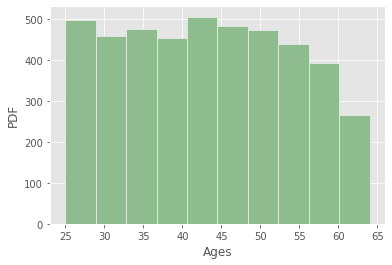

In [425]:
# A:
x=df['age']
plt.hist(x,bins=10,color='darkseagreen',edgecolor='white',histtype='bar')
plt.xlabel('Ages')
plt.ylabel('PDF')
plt.show()

#### 5.B BoxPlot of Age

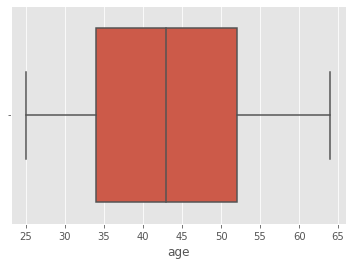

In [426]:
# A:
#df.boxplot(column =['age'],labels=)
#plt.show()
#sns.set_theme(style="whitegrid")

sns.boxplot(x=df["age"]);

In [428]:
df['age'].min(),df['age'].median(),df['age'].max()



(25, 43.0, 64)

#### 5.C Scatterplot of age and length_of_service

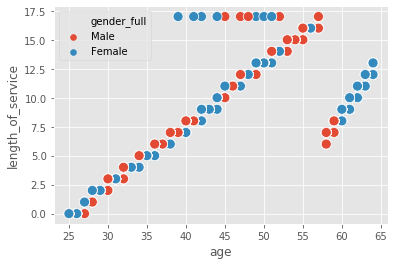

In [429]:
# A:
sns.scatterplot(x=df['age'],y=df['length_of_service'],hue=df['gender_full'],s=100, color=".3", marker="o");                       

In [430]:
df[['gender_full','age']].groupby('gender_full').agg(['count'])


,age
,count
gender_full,
Female,2379
Male,2066


In [439]:
df[['gender_full','age']].groupby('gender_full').agg(['min','max'])

age    
            min max
gender_full        
Female       25  64
Male         25  59

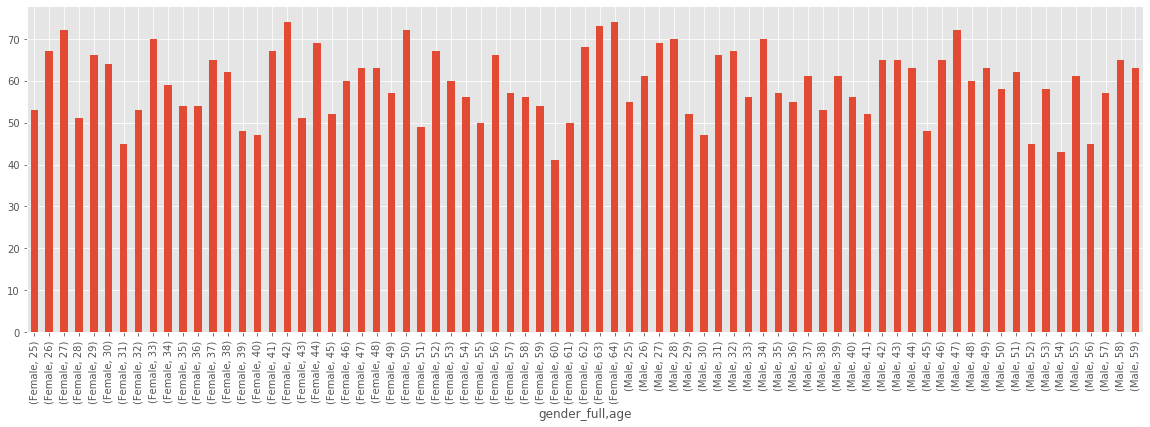

In [458]:
df.groupby(['gender_full','age'] )['gender_full'].count().plot.bar(figsize=(20, 6));

In [466]:
#Minimum age of the genders
max_ages=df.groupby(['gender_full']).max()
max_ages

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
gender_full,,,,,,,,,,,,,,,,,
Female,6631,12/31/2006 0:00,9/30/1981,9/30/2001,9/30/2009,64,17,Williams Lake,Training,VP Stores,46,F,Not Applicable,Not Applicable,2006,ACTIVE,STORES
Male,6630,12/31/2006 0:00,9/30/1977,9/30/2004,9/30/2010,59,17,Williams Lake,Training,VP Human Resources,46,M,Not Applicable,Not Applicable,2006,ACTIVE,STORES


In [467]:
#Maximum age of the genders
min_ages = df.groupby(['gender_full']).min()
min_ages

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
gender_full,,,,,,,,,,,,,,,,,
Female,1319,12/31/2006 0:00,1/01/1948,1/01/1990,1/01/1900,25,0,Abbotsford,Accounting,Accounting Clerk,1,F,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
Male,1318,12/31/2006 0:00,1/01/1952,1/01/1991,1/01/1900,25,0,Abbotsford,Accounts Payable,Accounts Payable Clerk,1,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE


#### 5.D Plot Histogram of store_name

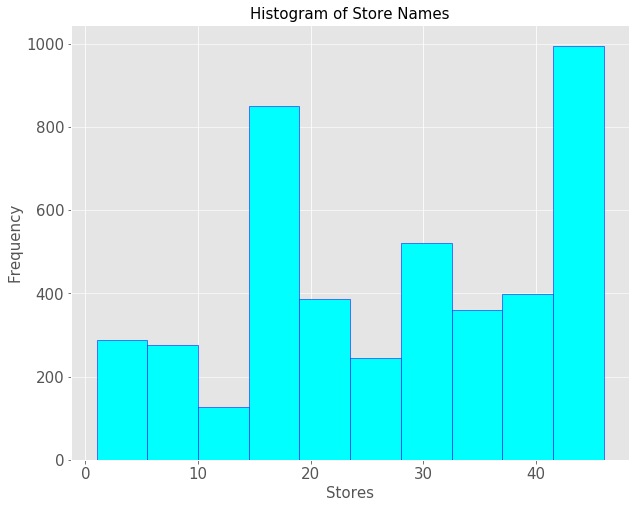

In [394]:
# A:
x = df['store_name']
plt.figure(figsize=[10,8])
plt.hist(x,bins=10,color='aqua',edgecolor = 'b')
#plt.xlim(min(edges), max(edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Stores',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Histogram of Store Names',fontsize=15)
#plt.style.use('ggplot')
plt.show()



#### 5.E Print Statistical Summary of Age


### A:You interpret a scatterplot by looking for trends in the 



#### As per the scatter plot it is reaveled that the relationship between the age and the length of service, indicates
#### a positive relationship as it progresses from left to right showing an uphill pattern.Furthermore highlighting 
#### thefact that female  and male employees's age ranging from 25-64, 25-59 years respectively.